<a href="https://colab.research.google.com/github/jaye311/CS133-Data-Visualization/blob/main/CS133_F25_M2_CL5_intro_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Working with Python DataFrame**

### **Learning outcome:**
- To learn to examine tabular raw data with a pandas dataframe
- To learn to filter data from a dataframe using index- or label-based selection.


####  **Crime Rates Dataset**
##### Load the dataset via a URL

In [23]:
# Importing libraries
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format
df = pd.DataFrame({'col1':[1,2,3], "col2":[4,5,6]}, index=["first", "second", "third"])
df

,col1,col2
first,1,4
second,2,5
third,3,6


In [ ]:
# Read in data set and converting it to a pandas dataframe
crime_rates = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/crime_rates.csv')

In [ ]:
# Let's take a look at the dataframe using head()
crime_rates.rename(columns={'Aggraveted Assault Rate': 'Aggravated Assault Rate'}, inplace=True )
crime_rates.head()


,State,Year,Population,Violent Crime Rate,Murder Rate,Forcible Rape Rate,Robbery Rate,Aggravated Assault Rate,Property Crime Rate,Burglary Rate,Larceny & Theft Rate,Motor Vehicle Theft Rate
0,Alaska,1960,226167,104.30,10.20,20.80,28.30,45.10,"1,544.90",332.10,970.50,242.30
1,Alaska,1961,234000,88.90,11.50,13.20,12.40,51.70,"1,540.60",380.80,950.00,209.80
2,Alaska,1962,246000,91.50,4.50,18.70,13.80,54.50,"1,564.60",351.60,985.40,227.60
3,Alaska,1963,248000,109.70,6.50,14.90,22.20,66.10,"1,952.80",381.50,"1,213.70",357.70
4,Alaska,1964,250000,150.00,10.40,22.40,21.20,96.00,"2,016.00",443.60,"1,218.40",354.00


In [ ]:
### Summary of DataFrame
crime_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State                     2200 non-null   object 
 1   Year                      2200 non-null   int64  
 2   Population                2200 non-null   int64  
 3   Violent Crime Rate        2200 non-null   float64
 4   Murder Rate               2200 non-null   float64
 5   Forcible Rape Rate        2200 non-null   float64
 6   Robbery Rate              2200 non-null   float64
 7   Aggravated Assault Rate   2200 non-null   float64
 8   Property Crime Rate       2200 non-null   float64
 9   Burglary Rate             2200 non-null   float64
 10  Larceny & Theft Rate      2200 non-null   float64
 11  Motor Vehicle Theft Rate  2200 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 206.4+ KB


In [ ]:
### Descriptive statistics for numerical columns
crime_rates.describe()

,Year,Population,Violent Crime Rate,Murder Rate,Forcible Rape Rate,Robbery Rate,Aggravated Assault Rate,Property Crime Rate,Burglary Rate,Larceny & Theft Rate,Motor Vehicle Theft Rate
count,"2,200.00","2,200.00","2,200.00","2,200.00","2,200.00","2,200.00","2,200.00","2,200.00","2,200.00","2,200.00","2,200.00"
mean,"1,981.50","4,609,092.06",369.86,6.38,26.86,115.55,221.07,"3,736.73",965.01,"2,412.48",359.23
std,12.70,"5,009,459.77",243.08,3.76,15.83,98.88,151.98,"1,454.85",446.38,955.27,207.75
min,"1,960.00","226,167.00",9.50,0.20,0.80,1.90,3.60,573.10,182.60,293.30,48.30
25%,"1,970.75","1,182,750.00",173.30,3.20,14.58,38.07,100.97,"2,640.65",618.63,"1,700.40",195.90
50%,"1,981.50","3,187,500.00",320.90,5.70,25.40,93.85,190.75,"3,815.75",910.45,"2,495.15",324.45
75%,"1,992.25","5,440,050.25",522.65,9.10,36.73,160.40,308.18,"4,703.53","1,232.68","3,025.53",471.10
max,"2,003.00","35,484,453.00","1,244.30",20.30,102.20,684.00,785.70,"7,996.00","2,906.70","5,106.10","1,571.10"


In [ ]:
### Customize the dataframe using our column names
crime_rates.columns = ['state', 'year', 'pop', 'violent', 'murder',
                       'rape', 'robbery', 'assault', 'property',
                       'burglary', 'larceny','vehicle']
names = ['state', 'year', 'pop', 'violent', 'murder',
                       'rape', 'robbery', 'assault', 'property',
                       'burglary', 'larceny','vehicle']
crime_rates.columns = names
## There is another way to do this where you can assign the column name to a list first. See if you can try both ways.

## Data manipulation and analysis
You can select rows with specific column value that you specify

In [ ]:
alaska_crimes = crime_rates[crime_rates['state']=='California']
alaska_crimes.head()

,state,year,pop,violent,murder,rape,robbery,assault,property,burglary,larceny,vehicle
176,California,1960,15717204,239.00,3.90,18.20,97.30,119.60,"3,235.40",910.50,"1,984.80",340.10
177,California,1961,16397000,232.70,3.70,18.50,90.50,120.00,"3,177.50",894.20,"1,950.60",332.70
178,California,1962,16970000,234.80,3.90,17.40,91.90,121.70,"3,326.20",934.10,"2,052.90",339.20
179,California,1963,17590000,241.20,3.80,17.50,93.60,126.30,"3,545.80",998.90,"2,184.70",362.20
180,California,1964,18084000,265.60,4.10,20.00,103.20,138.20,"3,874.30","1,088.70","2,366.50",419.10


#Index operator and attribute selection
## Index-based selection
Pandas has its own indexing operators, `iloc` and `loc`.
- `.iloc[ ]`: index-based selection that selects data based on its numerical position in the data
- `.loc[ ]`: primarily label based

&nbsp;  
**Indexing in pandas**  
- [start:stop:skip] #stop is exclusive [1:3] --> index 1 & 2  
- [1::2, :] #from the 2nd row all the way to the end every other row, and all the columns  
- [:, :3] #all rows, from the beginning to the 3rd column (0, 1, 2)

In [ ]:
crime_rates.iloc[0] #select first row

,0
state,Alaska
year,1960
pop,226167
violent,104.30
murder,10.20
rape,20.80
robbery,28.30
assault,45.10
property,"1,544.90"
burglary,332.10


In [ ]:
crime_rates.iloc[:, 0] #all rows, first column

,state
0,Alaska
1,Alaska
2,Alaska
3,Alaska
4,Alaska
...,...
2195,Wyoming
2196,Wyoming
2197,Wyoming
2198,Wyoming


The `:` operator from native Python is equivalent to "everything". When combined with other selectors, however, it can be used to indicate a range of values. For example, to select the country column from just the first, second, and third row, we would do:

In [ ]:
crime_rates.iloc[:3, 3:]

,violent,murder,rape,robbery,assault,property,burglary,larceny,vehicle
0,104.30,10.20,20.80,28.30,45.10,"1,544.90",332.10,970.50,242.30
1,88.90,11.50,13.20,12.40,51.70,"1,540.60",380.80,950.00,209.80
2,91.50,4.50,18.70,13.80,54.50,"1,564.60",351.60,985.40,227.60


## Label-based selection
`loc` operator is an attribute selection that is a label-based selection. The selection is based on the data index value, not its position.

In [ ]:
# crime_rates.loc[:, ['year', 'state', 'pop']]

## Simple data analysis
Let's take a look at the crime rates in Alaska throughout the years.

In [ ]:
### Select crimes data for state of Alaska
alaska_crimes = crime_rates[crime_rates['state']=='Alaska']

### Set the year as the index of the DataFrame
alaska_crimes_by_year = alaska_crimes.set_index('year')
alaska_crimes_by_year.head()

,state,pop,violent,murder,rape,robbery,assault,property,burglary,larceny,vehicle
year,,,,,,,,,,,
1960,Alaska,226167,104.30,10.20,20.80,28.30,45.10,"1,544.90",332.10,970.50,242.30
1961,Alaska,234000,88.90,11.50,13.20,12.40,51.70,"1,540.60",380.80,950.00,209.80
1962,Alaska,246000,91.50,4.50,18.70,13.80,54.50,"1,564.60",351.60,985.40,227.60
1963,Alaska,248000,109.70,6.50,14.90,22.20,66.10,"1,952.80",381.50,"1,213.70",357.70
1964,Alaska,250000,150.00,10.40,22.40,21.20,96.00,"2,016.00",443.60,"1,218.40",354.00


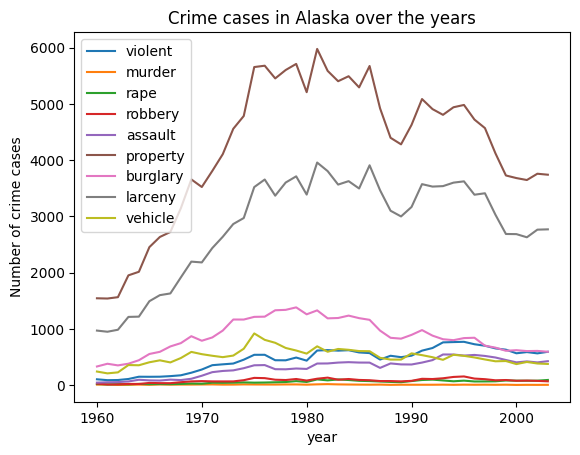

In [ ]:
### Use iloc to select all rows and all the columns about crime rates
### Use plot.line() to create DataFrame (or Series) as lines
lines = alaska_crimes_by_year.iloc[:,2:].plot.line(ylabel="Number of crime cases", title="Crime cases in Alaska over the years")

# Class Exercise
In class we will break up into different groups and work together to come up with solutions to your assigned question. After your group have finalize their solution, add it to the class notebook below. Remember to include everyone's name under the exercise.  

If you have questions or feedback for each other such as a different approach to the solution, create a new cell with your comments, questions, suggestion, code, etc... Let's work together to learn pandas.

## **Class Exercise CL5.1**
Filter the dataset for counts of robberies, bugarlies and murder cases in Alaska between the year of 1970 and 1979, inclusively. Which year had the highest number of crime cases for each of the three crime types?

&nbsp;  
**Here is your answer for CL5.1** (Create a code box below with your code)  
Group members:   
Final answer:

## **Class Exercise CL5.2**
Which state had the highest number of vehicle crimes cases for the year 1982.

&nbsp;  
**Here is your answer for CL5.2** (Create a code box below with your code)  
Group members:   
Final answer:

## **Class Exercise CL5.3**
Create a line plot that display the number of crime cases for California for the year between 1980 and 2003, inclusively. For the line plot, the horizontal axis is year and vertical axis is the number of crime cases.  
*Hint: Use `&` to combine two conditions*  
see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html

&nbsp;  
**Here is your answer for CL5.3** (Create a code box below with your code to plot the line plot)  
Group members:   

## **Class Exercise CL5.4**
Create a line plot that display the number of crime cases for Oregon between the year 1980 and 2000, inclusively. For the line plot, display the trend line to show only crimes cases under 1000 (where the number of crime cases is on the vertical axis) and the horizontal axis is year.  

&nbsp;  
### Here is your answer for CL5.4
Create a code box below with your answer for the above exercise

## **Class Exercise CL5.5**
Create a line plot that display the number of crime cases for Colorado for all the years and excluding the data for burglary, larceny, and property.

&nbsp;  
### Here is your answer for CL5.5
Create a code box below with your answer for the above exercise

In [ ]:
#exclude: burglary, larceny, property
#include: Colorado (all years)
#graph: line ()